
--- Weather Modeling using Quadratic Equation ---
1. Solve with hardcoded values
2. Solve with keyboard input
3. Solve with file input (single set of inputs)
4. Solve with file input (multiple sets of inputs)
5. Exit
Enter your choice (1-5): 1


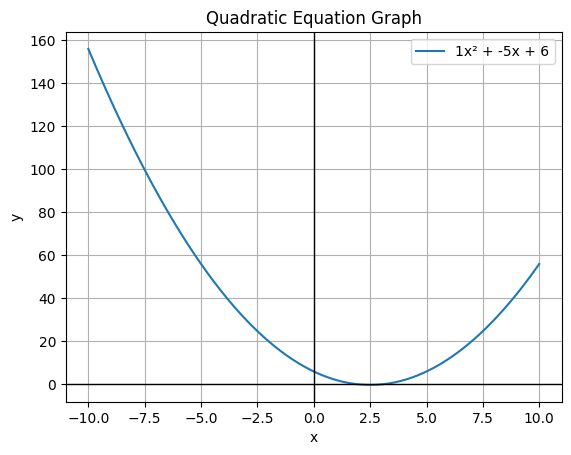


--- Weather Modeling using Quadratic Equation ---
1. Solve with hardcoded values
2. Solve with keyboard input
3. Solve with file input (single set of inputs)
4. Solve with file input (multiple sets of inputs)
5. Exit
Enter your choice (1-5): 2
Enter coefficient a: 2
Enter coefficient b: 6
Enter coefficient c: 3


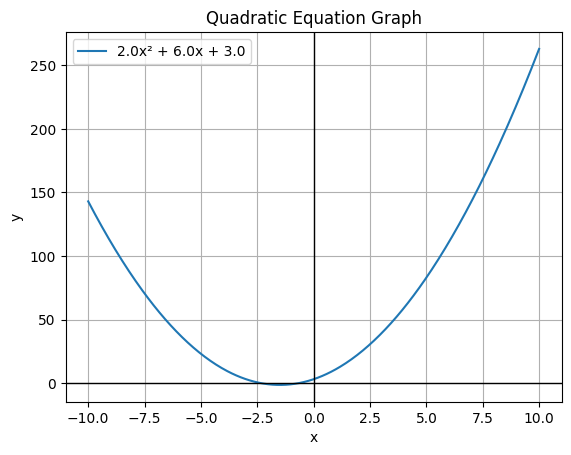


--- Weather Modeling using Quadratic Equation ---
1. Solve with hardcoded values
2. Solve with keyboard input
3. Solve with file input (single set of inputs)
4. Solve with file input (multiple sets of inputs)
5. Exit
Enter your choice (1-5): 3
Enter file name (e.g., 'data.txt'): /content/weather_data.txt


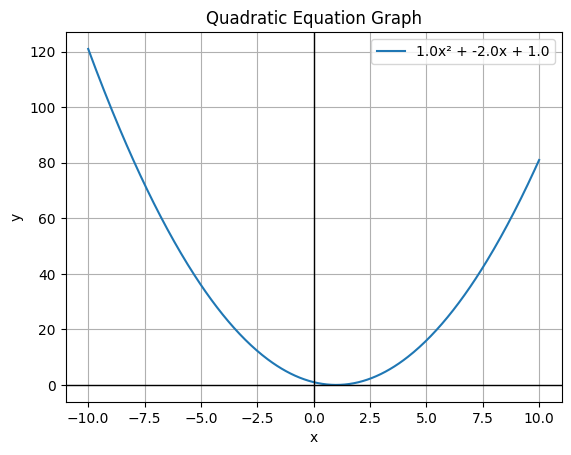


--- Weather Modeling using Quadratic Equation ---
1. Solve with hardcoded values
2. Solve with keyboard input
3. Solve with file input (single set of inputs)
4. Solve with file input (multiple sets of inputs)
5. Exit
Enter your choice (1-5): 4
Enter file name (e.g., 'data.txt'): /content/weather_data (1).txt


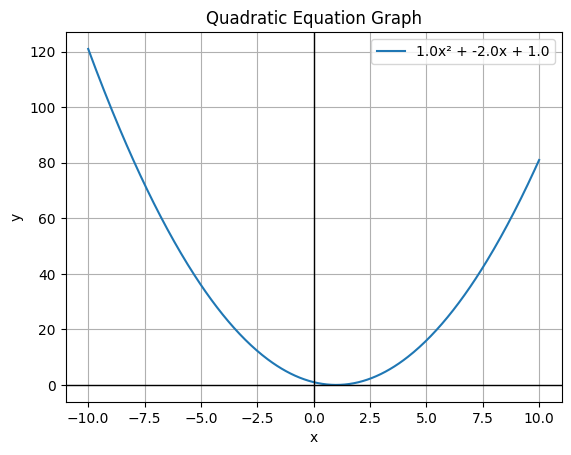

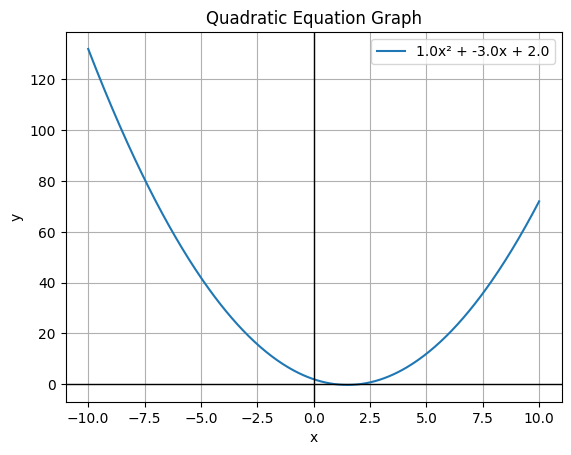

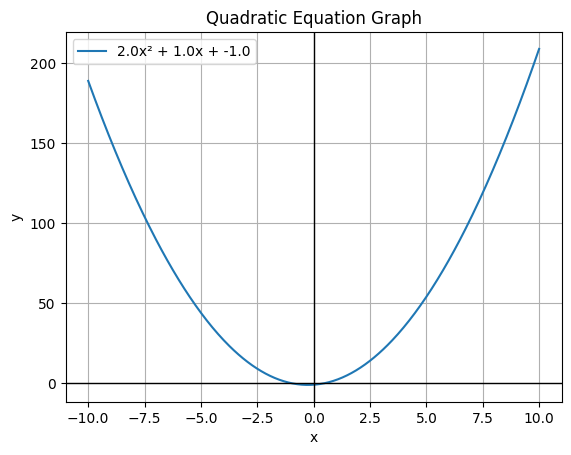


--- Weather Modeling using Quadratic Equation ---
1. Solve with hardcoded values
2. Solve with keyboard input
3. Solve with file input (single set of inputs)
4. Solve with file input (multiple sets of inputs)
5. Exit
Enter your choice (1-5): 5
Exiting...


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import logging

# Set up logging
logging.basicConfig(filename='quadratic_solver.log', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')


def solve_quadratic(a, b, c):
    """Solve the quadratic equation ax^2 + bx + c = 0."""
    if a == 0:
        logging.error("Coefficient 'a' cannot be zero (not a quadratic equation).")
        return None

    discriminant = b ** 2 - 4 * a * c
    roots = None

    if discriminant > 0:
        root1 = (-b + math.sqrt(discriminant)) / (2 * a)
        root2 = (-b - math.sqrt(discriminant)) / (2 * a)
        roots = (root1, root2)
        logging.info(f"Two solutions: {root1:.2f}, {root2:.2f}")
    elif discriminant == 0:
        root = -b / (2 * a)
        roots = (root,)
        logging.info(f"One solution: {root:.2f}")
    else:
        logging.warning("No real solutions (discriminant < 0).")

    plot_quadratic(a, b, c)
    return roots


def plot_quadratic(a, b, c):
    """Plot the quadratic equation y = ax^2 + bx + c."""
    x = np.linspace(-10, 10, 400)
    y = a * x ** 2 + b * x + c

    plt.plot(x, y, label=f"{a}x² + {b}x + {c}")
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    plt.title('Quadratic Equation Graph')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()


def save_results(results):
    """Save results to a file."""
    with open("results.txt", "w") as file:
        for entry in results:
            file.write(f"{entry}\n")


def hardcoded_solution():
    """Solve quadratic equation with hardcoded values."""
    logging.info("--- Hardcoded Solution ---")
    a, b, c = 1, -5, 6  # Example coefficients
    results = solve_quadratic(a, b, c)
    return f"Hardcoded Solution: {results}"


def keyboard_input_solution():
    """Solve quadratic equation with keyboard input."""
    logging.info("--- Keyboard Input Solution ---")
    try:
        a = float(input("Enter coefficient a: "))
        b = float(input("Enter coefficient b: "))
        c = float(input("Enter coefficient c: "))
        results = solve_quadratic(a, b, c)
        return f"Keyboard Input Solution: {results}"
    except ValueError:
        logging.error("Invalid input. Please enter numerical values.")
        return "Invalid input."


def file_input_solution(file_name, single_input=True):
    """Solve quadratic equation by reading coefficients from a file."""
    logging.info("--- File Input Solution ---")
    results = []
    try:
        with open(file_name, "r") as file:
            if single_input:
                line = file.readline().strip()
                a, b, c = map(float, line.split(","))
                results.append(f"File Input Solution (Single): {solve_quadratic(a, b, c)}")
            else:
                for line in file:
                    try:
                        a, b, c = map(float, line.strip().split(","))
                        results.append(f"File Input Solution (Multiple): {solve_quadratic(a, b, c)}")
                    except ValueError:
                        logging.warning(f"Invalid line format: {line.strip()}")
        save_results(results)
    except FileNotFoundError:
        logging.error("File not found.")
        return "File not found."
    return results


def main():
    """Main function to manage quadratic equation solving."""
    logging.info("--- Program Started ---")
    results = []

    while True:
        print("\n--- Weather Modeling using Quadratic Equation ---")
        print("1. Solve with hardcoded values")
        print("2. Solve with keyboard input")
        print("3. Solve with file input (single set of inputs)")
        print("4. Solve with file input (multiple sets of inputs)")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ")

        if choice == "1":
            results.append(hardcoded_solution())
        elif choice == "2":
            results.append(keyboard_input_solution())
        elif choice == "3":
            file_name = input("Enter file name (e.g., 'data.txt'): ")
            results.extend(file_input_solution(file_name, single_input=True))
        elif choice == "4":
            file_name = input("Enter file name (e.g., 'data.txt'): ")
            results.extend(file_input_solution(file_name, single_input=False))
        elif choice == "5":
            print("Exiting...")
            save_results(results)
            logging.info("--- Program Ended ---")
            break
        else:
            logging.warning("Invalid choice. Please select a valid option.")
            print("Invalid choice.")

if __name__ == "__main__":
    main()
